# WINE QUALITY RED PROJECT

**Predict the Quality of Red Wine on a Scale of 0 - 10 Using Neural Networks**

**Author: Andrii Kobyliuk**


**Import Common Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load and View raw data

**View Available Files**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/redwinednn/sample_submission.csv
/kaggle/input/redwinednn/train.csv
/kaggle/input/redwinednn/test.csv


**Import Data Sets**

In [3]:
train = pd.read_csv("/kaggle/input/redwinednn/train.csv")
test = pd.read_csv("/kaggle/input/redwinednn/test.csv")

**View Information About Data Sets**

In [4]:
train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2


In [5]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
1,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,10
2,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,14


In [6]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,8.354009,0.529436,0.273938,2.558634,0.087333,15.798238,46.379736,0.996797,3.310414,0.654502,10.406461,5.623789,791.185903
std,1.754626,0.181276,0.195195,1.444702,0.044984,10.603018,33.913169,0.001859,0.152432,0.169567,1.046551,0.794801,462.877710
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.500000,3.000000,0.000000
25%,7.100000,0.400000,0.100000,1.900000,0.070500,7.000000,21.000000,0.995610,3.210000,0.550000,9.500000,5.000000,389.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,13.000000,37.000000,0.996760,3.310000,0.620000,10.200000,6.000000,774.000000
75%,9.300000,0.640000,0.440000,2.600000,0.091000,22.000000,62.000000,0.997900,3.400000,0.730000,11.000000,6.000000,1190.500000
max,15.900000,1.580000,1.000000,15.500000,0.610000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1598.000000


In [7]:
test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.00000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,8.235560,0.523869,0.263728,2.490302,0.087793,16.06250,46.683190,0.996625,3.312823,0.667069,10.463398,818.114224
std,1.706501,0.173647,0.193853,1.321264,0.051857,10.11096,30.295607,0.001952,0.159221,0.169212,1.111167,458.866867
min,4.700000,0.160000,0.000000,0.900000,0.012000,3.00000,6.000000,0.990070,2.860000,0.390000,8.400000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.00000,24.000000,0.995500,3.210000,0.560000,9.500000,407.750000
50%,7.800000,0.515000,0.250000,2.200000,0.078000,14.00000,39.000000,0.996680,3.310000,0.630000,10.200000,860.000000
75%,9.100000,0.636250,0.400000,2.600000,0.089000,21.00000,63.000000,0.997600,3.400000,0.732500,11.200000,1235.250000
max,15.600000,1.330000,0.760000,15.400000,0.611000,68.00000,147.000000,1.003690,4.010000,1.980000,14.000000,1597.000000


# Data Visualization

**Drop useless column**

In [8]:
train1 = train.drop(["Id"],axis=1)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

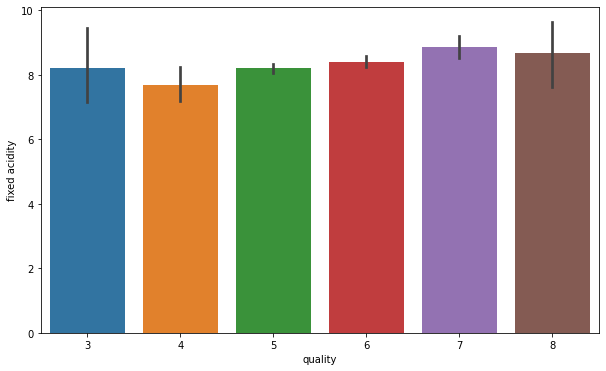

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = train1)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

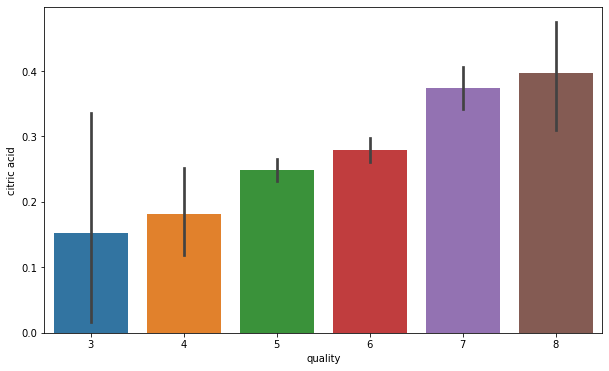

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = train1)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

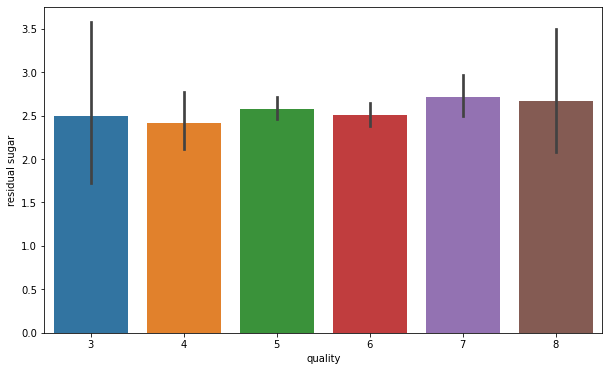

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = train1)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

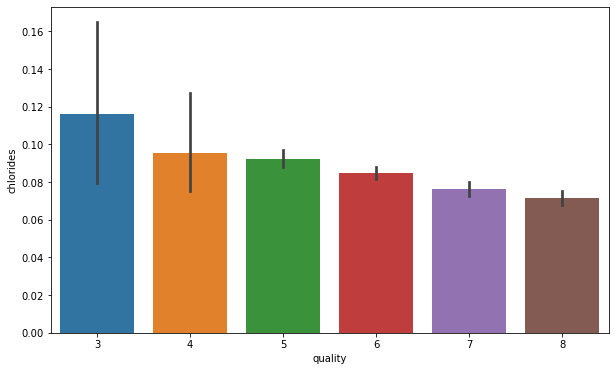

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = train1)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

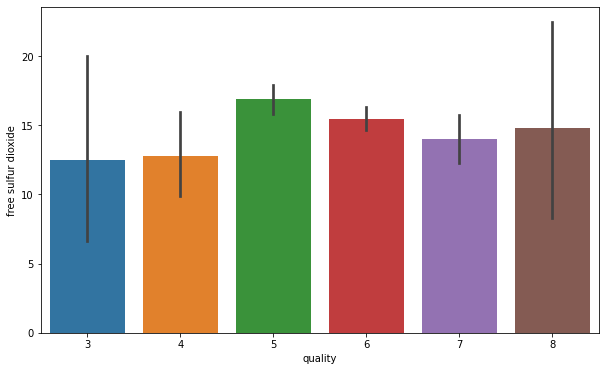

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = train1)

**Correlation Observations**

<AxesSubplot:>

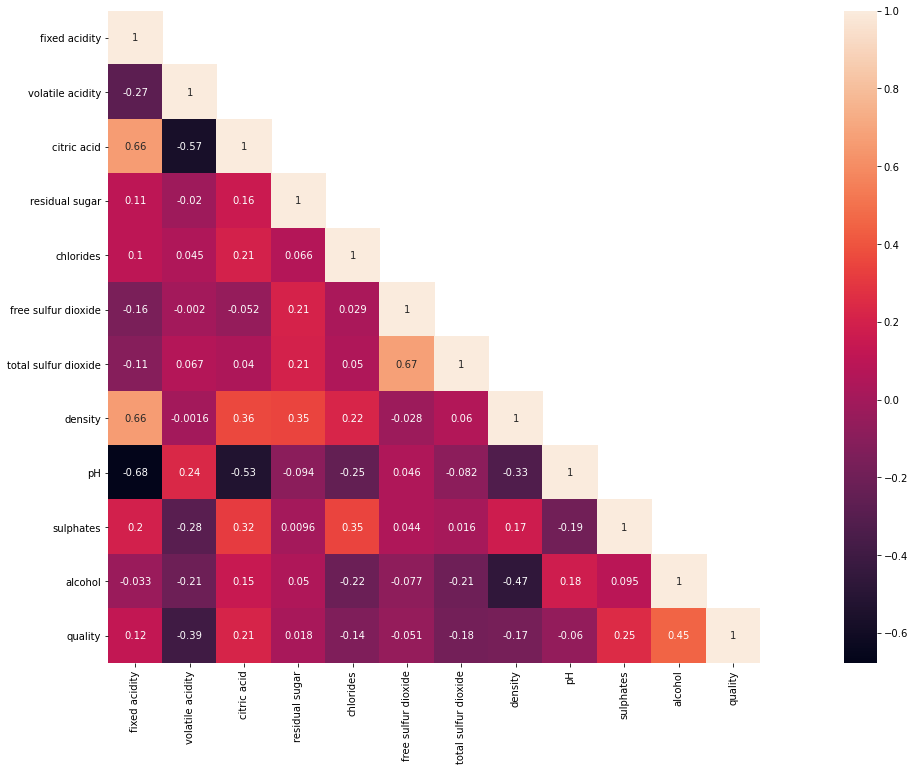

In [14]:
cor_mat= train1.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# Data Preprocessing

**Remove Outliers Using IQR**

In [15]:
q1 = train1.quantile(0.25)
q3 = train1.quantile(0.75)
iqr = q3-q1
l = q1-1.5*iqr
h = q3+1.5*iqr

train2 = train1[((train1 >= (q1 - 1.5 * iqr))& (train1 <= (q3 + 1.5 * iqr))).all(axis=1)]
train2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,8.210859,0.524803,0.250525,2.191587,0.078720,14.866348,42.612172,0.996646,3.321695,0.630346,10.330827,5.613365
std,1.507009,0.166023,0.180091,0.440224,0.014607,8.820189,27.187981,0.001602,0.132958,0.117608,0.936840,0.705610
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,8.000000,22.000000,0.995570,3.230000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.088000,20.000000,56.000000,0.997673,3.410000,0.700000,11.000000,6.000000
max,12.600000,1.000000,0.730000,3.600000,0.121000,43.000000,122.000000,1.001000,3.670000,0.980000,13.000000,7.000000


**See Updated Distribution Of Values On Each Column**

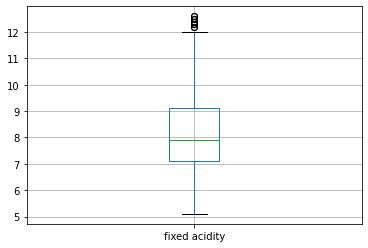

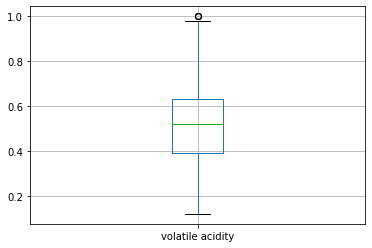

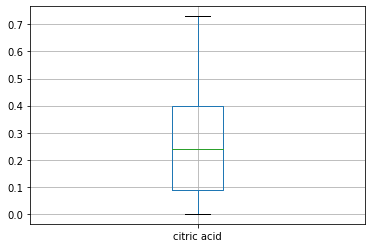

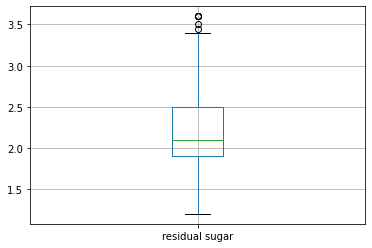

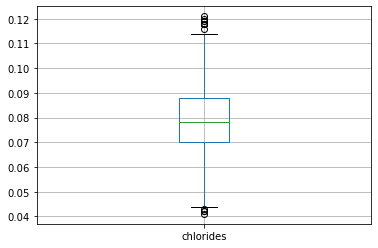

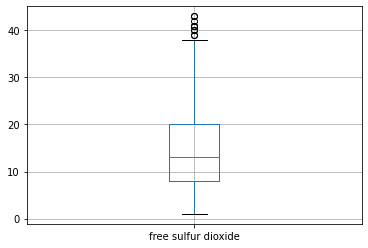

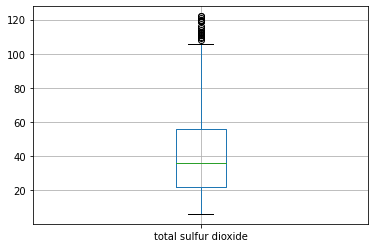

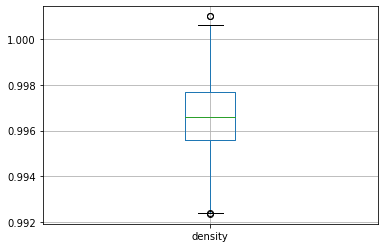

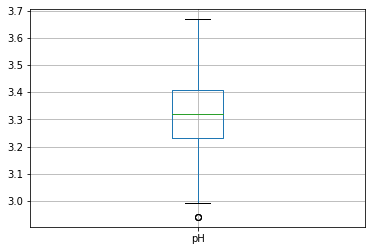

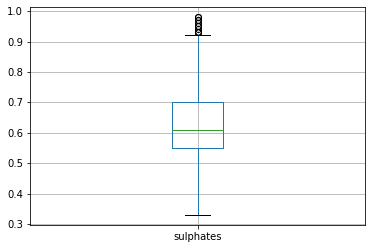

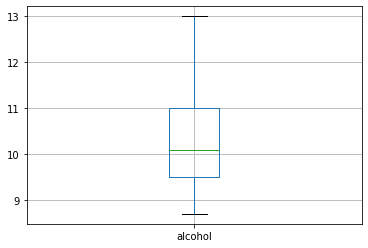

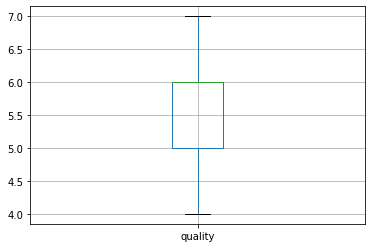

In [16]:
for i in train2.columns:
    train2.boxplot(column=i)
    plt.show()

**Correlation Observations After Filtering**

<AxesSubplot:>

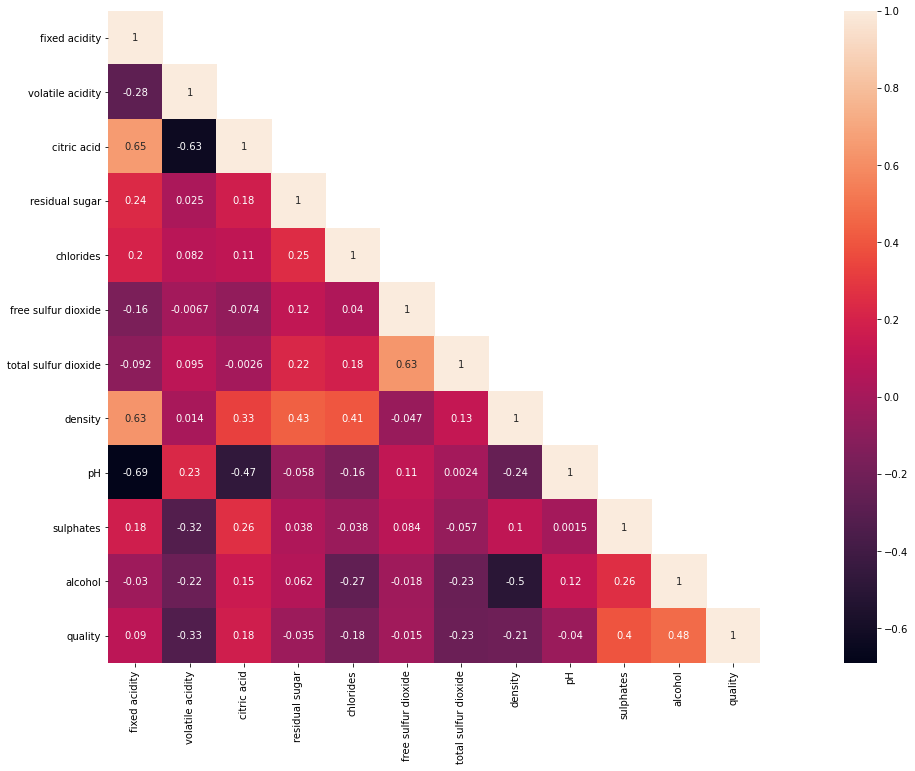

In [17]:
cor_mat= train2.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Correlation Observations With Respect To Target Value**

In [18]:
print(round(train2.corr()[['quality']].drop('quality'),2))

                      quality
fixed acidity            0.09
volatile acidity        -0.33
citric acid              0.18
residual sugar          -0.03
chlorides               -0.18
free sulfur dioxide     -0.02
total sulfur dioxide    -0.23
density                 -0.21
pH                      -0.04
sulphates                0.40
alcohol                  0.48


**Define a Function to get the Features that have Good Correlation with the Target Feature.**

In [19]:
def feature(threshold) :
    absolute_correlation = (train2.corr()["quality"].drop("quality")).abs()
    high_correlation = absolute_correlation[absolute_correlation > threshold].index.values.tolist()
    return high_correlation

In [20]:
Features = feature(0.22)
print(Features)

['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


**Splitting the Data**

In [21]:
from keras.utils import to_categorical

x_train = train2[Features]
y_train = to_categorical(train2["quality"])

x_test = test[Features]

**Scaling the Data**

In [22]:
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_train_transformed = sc1.fit_transform(x_train)
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

sc2=StandardScaler()
x_test_transformed = sc2.fit_transform(x_test)
x_test_transformed = pd.DataFrame(x_test_transformed,columns=x_test.columns)

In [23]:
x_train_transformed.sample(3)

,volatile acidity,total sulfur dioxide,sulphates,alcohol
434,0.513470,-0.684982,1.188166,0.821519
16,0.905217,1.449587,-0.768658,-0.246537
343,1.538038,-1.016209,-0.598499,1.035131


In [24]:
x_test_transformed.sample(3)

,volatile acidity,total sulfur dioxide,sulphates,alcohol
299,-1.348260,-0.980843,-0.219304,1.204180
261,-1.405910,-1.146061,-0.278465,1.744736
269,-0.656456,0.836561,-0.870076,-0.958043


In [25]:
x_train_transformed.describe()

,volatile acidity,total sulfur dioxide,sulphates,alcohol
count,8.380000e+02,8.380000e+02,8.380000e+02,8.380000e+02
mean,-3.942749e-16,3.072820e-17,-9.293812e-17,-6.157896e-16
std,1.000597e+00,1.000597e+00,1.000597e+00,1.000597e+00
min,-2.439695e+00,-1.347435e+00,-2.555324e+00,-1.741815e+00
25%,-7.973734e-01,-7.585882e-01,-6.835788e-01,-8.873701e-01
50%,-2.894767e-02,-2.433473e-01,-1.731029e-01,-2.465365e-01
75%,6.340078e-01,4.927112e-01,5.926110e-01,7.147138e-01
max,2.863949e+00,2.921704e+00,2.974832e+00,2.850826e+00


In [26]:
x_test_transformed.describe()

,volatile acidity,total sulfur dioxide,sulphates,alcohol
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,5.455406e-17,4.943962e-17,3.577119e-17,1.380002e-16
std,1.001079e+00,1.001079e+00,1.001079e+00,1.001079e+00
min,-2.097714e+00,-1.344324e+00,-1.639170e+00,-1.858970e+00
25%,-7.717565e-01,-7.495368e-01,-6.334316e-01,-8.679507e-01
50%,-5.112739e-02,-2.538811e-01,-2.193040e-01,-2.373022e-01
75%,6.478829e-01,5.391680e-01,3.870971e-01,6.636242e-01
max,4.647375e+00,3.314840e+00,7.767443e+00,3.186218e+00


# Neural Network

**Import Libaries**

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

**Define The Loss Function**

In [28]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

**Define The Optimizer**

In [29]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.6,
    beta_2=0.95,
    epsilon=1e-05,
    amsgrad=True,
    name="Adam"
)

NameError: name 'kwargs' is not defined

**Building The Model**

In [ ]:
model=Sequential()
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8,activation='softmax'))

**Configurating The Model**

In [ ]:
model.compile(optimizer=adam_optimizer,loss=root_mean_squared_error)

**Training The Model**

In [ ]:
training_history = model.fit(x_train_transformed, y_train,validation_split=0.66, epochs=200, batch_size=24)

In [ ]:
model.summary()

**List All Data in History**


In [ ]:
training_history.history.keys()

**Summarize History for Loss Function**

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model RSME')
plt.ylabel('Loss Fuction')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Predictions of Train Data Set**

In [ ]:
true_train = train2["quality"]

predict_train = np.argmax(model.predict(x_train_transformed), axis=-1)
print(predict_train)

**Predictions of Test Data Set**

In [ ]:
x_test = test.drop(["Id"],axis=1)

predict_test = np.argmax(model.predict(x_test_transformed), axis=-1)
print(predict_test)

**Save Results in submisson.csv**

In [ ]:
rst = predict_test.round(0)
ids = test['Id']

file = open("submission.csv", "w")
file.write("Id,quality\n")
    
for id, pred in zip(ids, rst):
    file.write("{},{}\n".format(id, round(pred)))
    print(id, round(pred))
file.close()